In [1]:
import BioSimSpace as BSS
import sire as sr

INFO:rdkit:Enabling RDKit 2024.03.5 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


## CHK1 20_17

In [3]:
# breaking of the dioxolane ring
compound_chk1_20 = BSS.IO.readMolecules(["inputs/chk_20.sdf"])[0]
compound_chk1_17 = BSS.IO.readMolecules(["inputs/chk_17.sdf"])[0]


In [4]:
# parametrize the molecules
compound_chk1_20 = BSS.Parameters.gaff2(compound_chk1_20).getMolecule()
compound_chk1_17 = BSS.Parameters.gaff2(compound_chk1_17).getMolecule()

In [5]:
mapping = BSS.Align.matchAtoms(compound_chk1_20, compound_chk1_17)

In [6]:
mapping

{0: 10,
 1: 9,
 2: 11,
 3: 12,
 4: 13,
 5: 14,
 6: 15,
 7: 16,
 8: 17,
 9: 18,
 10: 23,
 11: 22,
 12: 21,
 13: 20,
 14: 19,
 15: 8,
 16: 24,
 17: 25,
 18: 6,
 19: 5,
 20: 26,
 21: 27,
 22: 2,
 26: 3,
 27: 4,
 28: 7,
 29: 33,
 30: 34,
 31: 35,
 32: 36,
 33: 37,
 34: 45,
 35: 46,
 36: 44,
 37: 43,
 38: 50,
 39: 41,
 40: 40,
 41: 38,
 42: 39,
 43: 47,
 44: 48,
 45: 49,
 48: 32,
 49: 42}

In [7]:
mapping.update({23:1,24:0,25:31,46:28,47:30})

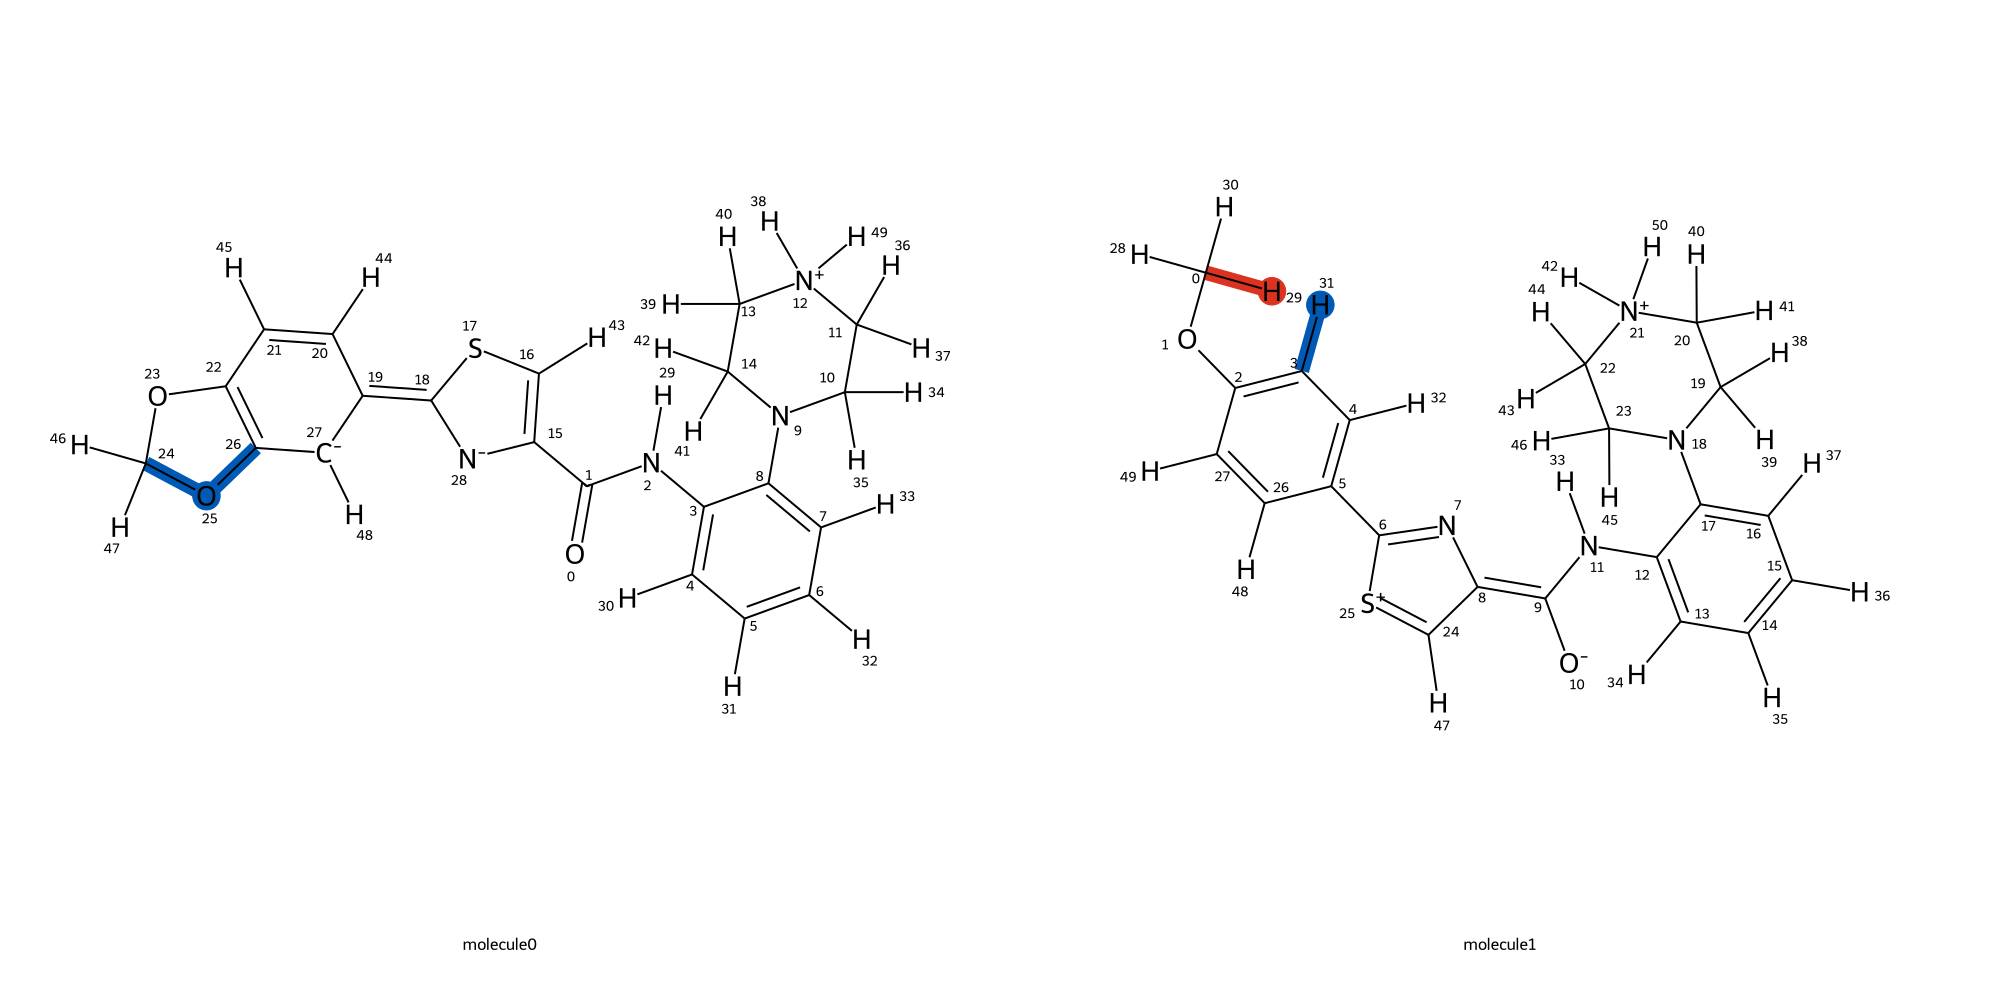

In [8]:
BSS.Align.viewMapping(compound_chk1_20, compound_chk1_17, mapping, pixels=1000)

In [9]:
compound_chk1_20_aligned = BSS.Align.rmsdAlign(compound_chk1_20, compound_chk1_17, mapping)

merged = BSS.Align.merge(compound_chk1_20_aligned, compound_chk1_17, mapping, allow_ring_breaking=True, allow_ring_size_change=True)

In [10]:
merged_system = merged.toSystem()

sire_system = sr.convert.biosimspace_to_sire(merged_system)
type(sire_system)

sire.system._system.System

In [11]:
sire_system[0].properties()

Properties(
    mass1 => SireMol::AtomMasses( size=51
0: 16 g mol-1
1: 12.01 g mol-1
2: 14.01 g mol-1
3: 12.01 g mol-1
4: 12.01 g mol-1
...
46: 1.008 g mol-1
47: 1.008 g mol-1
48: 1.008 g mol-1
49: 1.008 g mol-1
50: 1.008 g mol-1
),
    gb_screening1 => SireMol::AtomFloatProperty( size=51
0: 0.85
1: 0.72
2: 0.79
3: 0.72
4: 0.72
...
46: 0.85
47: 0.85
48: 0.85
49: 0.85
50: 0.85
),
    molecule0 => Molecule( 20:4    num_atoms=50 num_residues=1 ),
    element1 => SireMol::AtomElements( size=51
0: Oxygen (O, 8)
1: Carbon (C, 6)
2: Nitrogen (N, 7)
3: Carbon (C, 6)
4: Carbon (C, 6)
...
46: Hydrogen (H, 1)
47: Hydrogen (H, 1)
48: Hydrogen (H, 1)
49: Hydrogen (H, 1)
50: Hydrogen (H, 1)
),
    name1 => SireMol::AtomStringProperty( size=51
0: O
1: C
2: N
3: C
4: C
...
46: H
47: H
48: H
49: H
50: H
),
    radical0 => SireMol::AtomRadicals( size=51
0: undefined
1: undefined
2: undefined
3: undefined
4: undefined
...
46: undefined
47: undefined
48: undefined
49: undefined
50: undefined
),
    dihedr

In [12]:
sire_system[0].property("bond0")

TwoAtomFunctions( size=55
0:     O:1-C:2     : 590.6 [r - 1.219]^2
1:     C:2-N:3     : 317.46 [r - 1.3967]^2
2:     C:2-C:16    : 281.78 [r - 1.4687]^2
3:     N:3-C:4     : 291.11 [r - 1.4228]^2
4:     N:3-H:30    : 527.3 [r - 1.013]^2
...
50:    C:25-H:48    : 347.02 [r - 1.095]^2
51:    C:25-H:51    : 344.22 [r - 1.0969]^2
52:    O:26-C:27    : 343.34 [r - 1.3688]^2
53:    C:27-C:28    : 354.25 [r - 1.3986]^2
54:    C:28-H:49    : 360.69 [r - 1.086]^2
)

In [13]:
mol = sire_system.molecules("molecule property is_perturbable")
# sire_system = sr.morph.repartition_hydrogen_masses(sire_system)

perturbable_mol = mol[0]

pert = perturbable_mol.perturbation(map={"coordinates":"coordinates0"})
pert_omm = pert.to_openmm()
pert_omm.changed_bonds()

,bond,length0,length1,k0,k1
0,S:18-C:19,0.17622,0.17538,189560.304,193853.088
1,O:26-C:27,0.13688,0.10860,287306.912,301825.392
2,C:17-S:18,0.17622,0.17538,189560.304,193853.088
3,C:25-O:26,0.14273,0.14273,236203.536,0.000
4,C:2-C:16,0.14687,0.14728,235793.504,232730.816
5,C:17-H:44,0.10818,0.10809,307348.272,308544.896
6,C:19-N:29,0.13171,0.13158,349606.672,351221.696
7,C:19-C:20,0.14610,0.14528,241659.472,248111.200
8,C:25-H:47,0.10950,0.10969,290386.336,288043.296
9,C:25-H:48,0.10950,0.10969,290386.336,288043.296


In [14]:
pert_omm.changed_angles()

,angle,size0,size1,k0,k1
0,S:18-C:19-C:20,2.091254,2.120227,528.27184,527.26768
1,O:26-C:25-H:47,1.937840,1.937840,468.94272,0.00000
2,O:24-C:25-H:48,1.937840,1.925797,468.94272,470.28160
3,C:16-N:29-C:19,1.905028,1.839054,720.31744,730.94480
4,C:20-C:19-N:29,2.103995,2.153912,565.17472,560.82336
5,O:1-C:2-C:16,2.165256,2.159148,655.71648,655.29808
6,C:23-C:27-O:26,2.078863,2.092302,661.07200,375.72320
7,C:19-C:20-C:28,2.108882,2.110279,518.98336,520.40592
8,C:2-C:16-C:17,2.117434,2.117434,520.48960,519.65280
9,S:18-C:17-H:44,2.097887,2.097014,350.53552,352.37648


In [15]:
pert_omm.changed_torsions()

,torsion,k0,k1,periodicity0,periodicity1,phase0,phase1
0,C:23-C:27-O:26-C:25,6.945440,0.00000,2,2,3.141594,3.141594
1,C:27-O:26-C:25-H:48,1.603867,0.00000,3,3,-0.000000,-0.000000
2,O:24-C:25-O:26-C:27,1.603867,0.00000,3,3,-0.000000,-0.000000
3,C:17-S:18-C:19-N:29,6.694400,6.90360,2,2,3.141594,3.141594
4,C:25-O:26-C:27-C:28,6.945440,0.00000,2,2,3.141594,3.141594
5,C:27-O:26-C:25-H:47,1.603867,0.00000,3,3,-0.000000,-0.000000
6,C:16-C:17-S:18-C:19,10.167120,5.27184,1,1,3.141594,3.141594
7,C:23-O:24-C:25-O:26,1.603867,0.00000,3,3,-0.000000,-0.000000
8,C:17-S:18-C:19-C:20,10.167120,5.27184,1,1,3.141594,3.141594
9,C:19-C:20-C:28-C:21,4.602400,0.00000,2,2,3.141594,3.141594


### Free Leg

In [16]:
box, angles = BSS.Box.truncatedOctahedron(10 * BSS.Units.Length.nanometer)
print(box, angles)

# Get the minimium and maximum coordinates of the bounding box that
# minimally encloses the system
box_min, box_max = merged.getAxisAlignedBoundingBox()

# Work out the box size from the difference in the coordinates.
box_size = [y - x for x, y in zip(box_min, box_max)]

# How much to pad each side of the protein? (Nonbonded cutoff = 10 A)
padding = 15 * BSS.Units.Length.angstrom

# Work out an appropriate box. This will used in each dimension to ensure
# that the cutoff constraints are satisfied if the molecule rotates.
box_length = max(box_size) + 2 * padding

print("Box size:", box_length)

[100.0000 A, 100.0000 A, 100.0000 A] [109.4712 degrees, 70.5288 degrees, 70.5288 degrees]
Box size: 42.7811 A


In [17]:
solvated = BSS.Solvent.tip3p(molecule=merged, box=3 * [box_length], angles=angles, ion_conc=0.15, is_neutral=True)
solvated.reduceBoxVectors()

In [20]:
BSS.Stream.save(solvated, "prepared_rbfe_input_files/chk1_compound_20_to_17_free")

### Bound Leg

In [21]:
protein = BSS.IO.readMolecules(["inputs/protein_dry.pdb"])

In [22]:
protein = BSS.Parameters.ff14SB(protein[0], ensure_compatible=False).getMolecule()

In [23]:
protein_holo = protein + merged

In [24]:
box, angles = BSS.Box.truncatedOctahedron(10 * BSS.Units.Length.nanometer)
print(box, angles)

# Get the minimium and maximum coordinates of the bounding box that
# minimally encloses the protein.
box_min, box_max = protein_holo.getAxisAlignedBoundingBox()

# Work out the box size from the difference in the coordinates.
box_size = [y - x for x, y in zip(box_min, box_max)]

# How much to pad each side of the protein? (Nonbonded cutoff = 10 A)
padding = 15 * BSS.Units.Length.angstrom

# Work out an appropriate box. This will used in each dimension to ensure
# that the cutoff constraints are satisfied if the molecule rotates.
box_length = max(box_size) + 2 * padding

print("Box size:", box_length)

[100.0000 A, 100.0000 A, 100.0000 A] [109.4712 degrees, 70.5288 degrees, 70.5288 degrees]
Box size: 91.7980 A


In [27]:
solvated = BSS.Solvent.tip3p(molecule=protein_holo, box=3 * [box_length], angles=angles, ion_conc=0.15, is_neutral=True)
solvated.reduceBoxVectors()

In [28]:
BSS.Stream.save(solvated, "prepared_rbfe_input_files/chk1_compound_20_to_17_bound")